# Linear Regression with L1 and L2 Regularization

In [89]:
import os
import ssl
import certifi

# Patch SSL certificate verification manually
os.environ['SSL_CERT_FILE'] = certifi.where()
ssl._create_default_https_context = ssl.create_default_context


%pip install mglearn

## Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn # Import the mglearn library
X, y = mglearn.datasets.make_wave(n_samples=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [65]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(75, 1) (25, 1) (75,) (25,)


In [66]:
print("lr.coef_: ", lr.coef_)         # Weight (slope)
print("lr.intercept_: ", lr.intercept_) # Bias (intercept)

lr.coef_:  [0.40443939]
lr.intercept_:  -0.022568028173365354


In [67]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.59
Test set score: 0.66


## Overfitting Example

In [68]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.61


## Ridge Regularization (L2 Regularization)

Ridge regression minimizes the following objective:

$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} w_j^2
$$

Where:  
- $y_i$ is the true target  
- $\hat{y}_i = \mathbf{w} \cdot \mathbf{x}_i + b$ is the prediction  
- $w_j$ are the model weights  
- $\alpha$ is the regularization strength  
- The second term is the **L2 penalty**

---

In [69]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.89
Test set score: 0.75


Ridge (alpha=1.0) - Training set score: 0.89
Ridge (alpha=1.0) - Test set score: 0.75
Ridge (alpha=10) - Training set score: 0.79
Ridge (alpha=10) - Test set score: 0.64
Ridge (alpha=0.1) - Training set score: 0.93
Ridge (alpha=0.1) - Test set score: 0.77


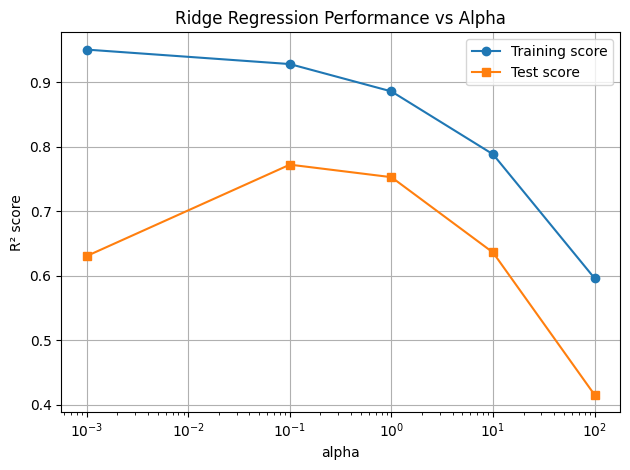

In [88]:
alphas = [0.001, 0.1, 1, 10, 100 ]

train_scores = []
test_scores = []
ridges = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridges.append(ridge)
    ridge.fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    


# Default alpha = 1.0
ridge = Ridge().fit(X_train, y_train)
print("Ridge (alpha=1.0) - Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge (alpha=1.0) - Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Stronger regularization
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge (alpha=10) - Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Ridge (alpha=10) - Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

# Weaker regularization
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge (alpha=0.1) - Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Ridge (alpha=0.1) - Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))





# Plotting the results
# plt.figure(figsize=(8, 5))
plt.plot(alphas, train_scores, label="Training score", marker='o')
plt.plot(alphas, test_scores, label="Test score", marker='s')
plt.xscale("log") 
plt.xlabel("alpha")
plt.ylabel("R² score")
plt.title("Ridge Regression Performance vs Alpha")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

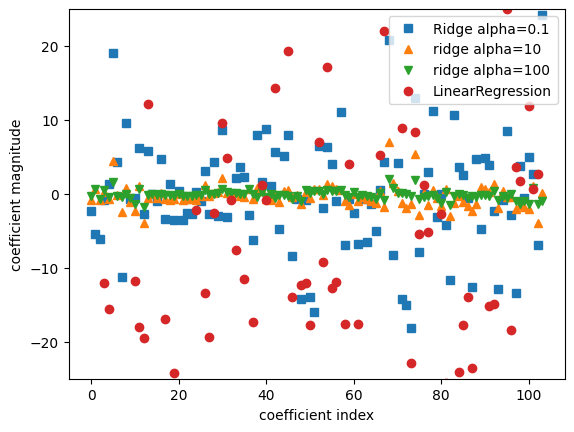

In [85]:
# plt.figure(figsize=(8, 5))

plt.plot(ridges[1].coef_, 's', label='Ridge alpha=0.1')
plt.plot(ridges[2].coef_, '^', label='ridge alpha=10')
plt.plot(ridges[3].coef_, 'v', label='ridge alpha=100')

plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.ylim(-25, 25)
plt.legend()

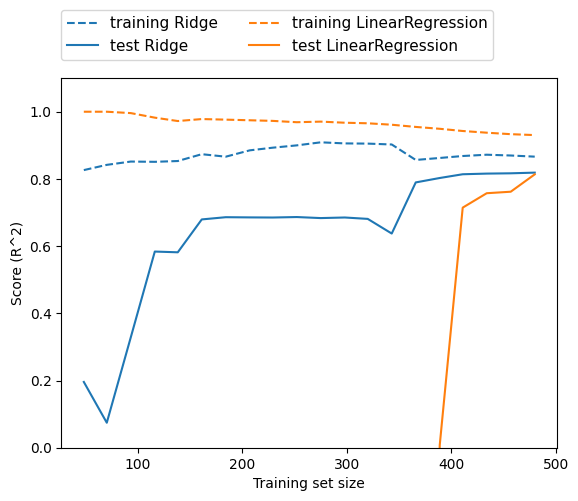

In [72]:
mglearn.plots.plot_ridge_n_samples()

## Lasso Regression (L1 Regularization)

Lasso regression minimizes the following objective:

$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |w_j|
$$

Where:  
- $|w_j|$ denotes the absolute value of each weight  
- The second term is the **L1 penalty**  
- This encourages **sparse** solutions (some weights become zero)

## Basic Lasso Regression (default alpha = 1.0)

In [73]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training score: 0.29
Test score: 0.21
Number of features used: 4


## Lasso with alpha=0.01 and increased max_iter

In [74]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training score: 0.90
Test score: 0.77
Features used: 33


## Lasso with very small alpha=0.0001 (almost no regularization)

In [75]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Features used: {}".format(np.sum(lasso0001.coef_ != 0)))

Training score: 0.95
Test score: 0.64
Features used: 96


## Coefficient Plot (Optional Visualization)

Text(0, 0.5, 'Coefficient magnitude')

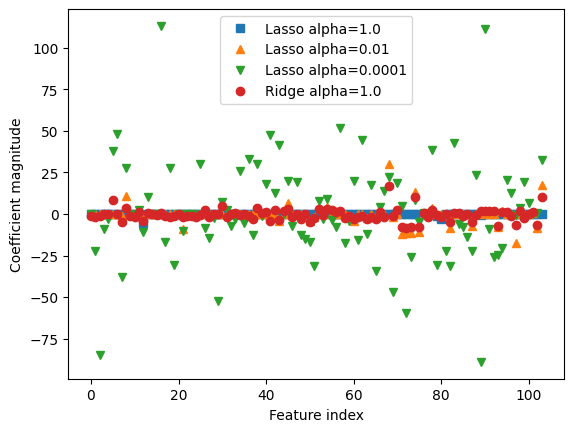

In [76]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1.0")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1.0")
plt.legend()
plt.xlabel("Feature index")
plt.ylabel("Coefficient magnitude")
